In [1]:
import pandas as pd
import nltk

In [2]:
books_data = pd.read_csv("./cleaned_data/cleaned_books.csv")
books_data.head(3)

title  \
0         Its Only Art If Its Well Hung!   
1               Dr. Seuss: American Icon   
2  Wonderful Worship in Smaller Churches   

                                         description           authors  \
0                                                NaN  ['Julie Strain']   
1  Philip Nel takes a fascinating look into the k...    ['Philip Nel']   
2  This resource includes twelve principles in un...  ['David R. Ray']   

  published_date                 categories  
0           1996    comics & graphic novels  
1     2005-01-01  biography & autobiography  
2           2000                   religion

In [3]:
ratings_data = pd.read_csv("./cleaned_data/cleaned_ratings.csv")
ratings_data

title  price review_helpfulness  \
0        Its Only Art If Its Well Hung!    NaN                7/7   
1              Dr. Seuss: American Icon    NaN              10/10   
2              Dr. Seuss: American Icon    NaN              10/11   
3              Dr. Seuss: American Icon    NaN                7/7   
4              Dr. Seuss: American Icon    NaN                3/3   
...                                 ...    ...                ...   
1623650             The Idea of History    NaN              12/14   
1623651             The Idea of History    NaN                3/3   
1623652             The Idea of History    NaN              14/19   
1623653             The Idea of History    NaN                1/1   
1623654             The Idea of History    NaN               7/49   

         review_score                                            summary  \
0                 4.0             Nice collection of Julie Strain images   
1                 5.0                                  Really Enjoyed It   
2                 5.0    Essential for every personal and Public Library   
3                 4.0    Phlip Nel gives silly Seuss a serious treatment   
4                 4.0                             Good academic overview   
...               ...                                                ...   
1623650           5.0      A magnificent book if you're motivated enough   
1623651           4.0                       Thoughtful Critic of History   
1623652           4.0                                          Difficult   
1623653           4.0      Quite good and ahead of its time occasionally   
1623654           1.0  Collingwood's ideas sink in a quagmire or verb...   

                                                      text  
0        This is only for Julie Strain fans. It's a col...  
1        I don't care much for Dr. Seuss but after read...  
2        If people become the books they read and if "t...  
3        Theodore Seuss Geisel (1904-1991), aka &quot;D...  
4        Philip Nel - Dr. Seuss: American IconThis is b...  
...                                                    ...  
1623650  R. G. Collingwood's The Idea of History would ...  
1623651  History is not a scientific process of cutting...  
1623652  This is an extremely difficult book to digest,...  
1623653  This is pretty interesting. Collingwood seems ...  
1623654  The guy has a few good ideas but, reader, bewa...  

[1623655 rows x 6 columns]

In [4]:
cleaned_text = pd.read_csv("./cleaned_data/cleaned_text_stemmed.csv")
cleaned_text.head()

Unnamed: 0                                               text
0           0  juli strain fan collect photo  80 page worth n...
1           1  dont care much dr seuss read philip nel book c...
2           2  peopl becom book read child father man dr seus...
3           3  theodor seuss geisel 19041991 aka quotdr seuss...
4           4  philip nel  dr seuss american iconthi basic ac...

In [5]:
ratings_data["cleaned_text"] = cleaned_text["text"]

# Replace NaN with empty string
ratings_data["cleaned_text"] = ratings_data["cleaned_text"].fillna("")

In [6]:
ratings_data

title  price review_helpfulness  \
0        Its Only Art If Its Well Hung!    NaN                7/7   
1              Dr. Seuss: American Icon    NaN              10/10   
2              Dr. Seuss: American Icon    NaN              10/11   
3              Dr. Seuss: American Icon    NaN                7/7   
4              Dr. Seuss: American Icon    NaN                3/3   
...                                 ...    ...                ...   
1623650             The Idea of History    NaN              12/14   
1623651             The Idea of History    NaN                3/3   
1623652             The Idea of History    NaN              14/19   
1623653             The Idea of History    NaN                1/1   
1623654             The Idea of History    NaN               7/49   

         review_score                                            summary  \
0                 4.0             Nice collection of Julie Strain images   
1                 5.0                                  Really Enjoyed It   
2                 5.0    Essential for every personal and Public Library   
3                 4.0    Phlip Nel gives silly Seuss a serious treatment   
4                 4.0                             Good academic overview   
...               ...                                                ...   
1623650           5.0      A magnificent book if you're motivated enough   
1623651           4.0                       Thoughtful Critic of History   
1623652           4.0                                          Difficult   
1623653           4.0      Quite good and ahead of its time occasionally   
1623654           1.0  Collingwood's ideas sink in a quagmire or verb...   

                                                      text  \
0        This is only for Julie Strain fans. It's a col...   
1        I don't care much for Dr. Seuss but after read...   
2        If people become the books they read and if "t...   
3        Theodore Seuss Geisel (1904-1991), aka &quot;D...   
4        Philip Nel - Dr. Seuss: American IconThis is b...   
...                                                    ...   
1623650  R. G. Collingwood's The Idea of History would ...   
1623651  History is not a scientific process of cutting...   
1623652  This is an extremely difficult book to digest,...   
1623653  This is pretty interesting. Collingwood seems ...   
1623654  The guy has a few good ideas but, reader, bewa...   

                                              cleaned_text  
0        juli strain fan collect photo  80 page worth n...  
1        dont care much dr seuss read philip nel book c...  
2        peopl becom book read child father man dr seus...  
3        theodor seuss geisel 19041991 aka quotdr seuss...  
4        philip nel  dr seuss american iconthi basic ac...  
...                                                    ...  
1623650  r g collingwood idea histori would correctli c...  
1623651  histori scientif process cut past event sequen...  
1623652  extrem difficult book digest casual reader how...  
1623653  pretti interest collingwood seem like first hi...  
1623654  guy good idea reader bewar transcipt sever dif...  

[1623655 rows x 7 columns]

# Make Vectors

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
# Keep words that appear in more than 0.5% of the documents
vectorizer = CountVectorizer(min_df=0.005)
word_counts = vectorizer.fit_transform(ratings_data["cleaned_text"])

KeyboardInterrupt: 

In [8]:
word_counts

<1623655x2156 sparse matrix of type '<class 'numpy.int64'>'
	with 90919026 stored elements in Compressed Sparse Row format>

In [11]:
# Get the sum of each word in the text
word_counts_df = pd.DataFrame()
word_counts_df["word"] = vectorizer.get_feature_names_out()
word_counts_df["count"] = word_counts.sum(axis=0).T
word_counts_df

word   count
0          10   34950
1         100   24265
2          11   12316
3          12   24580
4          13   14681
...       ...     ...
2151    young  165931
2152  younger   25045
2153     your   84839
2154    youth   19977
2155     youv   31719

[2156 rows x 2 columns]

In [10]:
1000 / len(ratings_data)

0.0006158943864306149

In [13]:
# Write the vectorizer to a file and also word_counts
import os
import pickle

if not os.path.exists("pickles"):
    os.makedirs("pickles")

pickle.dump(vectorizer, open("pickles/vectorizer.pkl", "wb"))
pickle.dump(word_counts, open("pickles/word_counts_mat.pkl", "wb"))

In [7]:
import pickle
# Load the vectorizer and word_counts
vectorizer = pickle.load(open("pickles/vectorizer.pkl", "rb"))
word_counts = pickle.load(open("pickles/word_counts_mat.pkl", "rb"))

In [8]:
word_counts

<1623655x2156 sparse matrix of type '<class 'numpy.int64'>'
	with 90919026 stored elements in Compressed Sparse Row format>

In [9]:
ratings_data

title  price review_helpfulness  \
0        Its Only Art If Its Well Hung!    NaN                7/7   
1              Dr. Seuss: American Icon    NaN              10/10   
2              Dr. Seuss: American Icon    NaN              10/11   
3              Dr. Seuss: American Icon    NaN                7/7   
4              Dr. Seuss: American Icon    NaN                3/3   
...                                 ...    ...                ...   
1623650             The Idea of History    NaN              12/14   
1623651             The Idea of History    NaN                3/3   
1623652             The Idea of History    NaN              14/19   
1623653             The Idea of History    NaN                1/1   
1623654             The Idea of History    NaN               7/49   

         review_score                                            summary  \
0                 4.0             Nice collection of Julie Strain images   
1                 5.0                                  Really Enjoyed It   
2                 5.0    Essential for every personal and Public Library   
3                 4.0    Phlip Nel gives silly Seuss a serious treatment   
4                 4.0                             Good academic overview   
...               ...                                                ...   
1623650           5.0      A magnificent book if you're motivated enough   
1623651           4.0                       Thoughtful Critic of History   
1623652           4.0                                          Difficult   
1623653           4.0      Quite good and ahead of its time occasionally   
1623654           1.0  Collingwood's ideas sink in a quagmire or verb...   

                                                      text  \
0        This is only for Julie Strain fans. It's a col...   
1        I don't care much for Dr. Seuss but after read...   
2        If people become the books they read and if "t...   
3        Theodore Seuss Geisel (1904-1991), aka &quot;D...   
4        Philip Nel - Dr. Seuss: American IconThis is b...   
...                                                    ...   
1623650  R. G. Collingwood's The Idea of History would ...   
1623651  History is not a scientific process of cutting...   
1623652  This is an extremely difficult book to digest,...   
1623653  This is pretty interesting. Collingwood seems ...   
1623654  The guy has a few good ideas but, reader, bewa...   

                                              cleaned_text  
0        juli strain fan collect photo  80 page worth n...  
1        dont care much dr seuss read philip nel book c...  
2        peopl becom book read child father man dr seus...  
3        theodor seuss geisel 19041991 aka quotdr seuss...  
4        philip nel  dr seuss american iconthi basic ac...  
...                                                    ...  
1623650  r g collingwood idea histori would correctli c...  
1623651  histori scientif process cut past event sequen...  
1623652  extrem difficult book digest casual reader how...  
1623653  pretti interest collingwood seem like first hi...  
1623654  guy good idea reader bewar transcipt sever dif...  

[1623655 rows x 7 columns]

In [10]:
# Add a categories column from the books_data to the ratings_data with a left join on title
ratings_data = ratings_data.merge(books_data[["title", "categories"]], on="title", how="left")

In [11]:
ratings_data

title  price review_helpfulness  \
0        Its Only Art If Its Well Hung!    NaN                7/7   
1              Dr. Seuss: American Icon    NaN              10/10   
2              Dr. Seuss: American Icon    NaN              10/11   
3              Dr. Seuss: American Icon    NaN                7/7   
4              Dr. Seuss: American Icon    NaN                3/3   
...                                 ...    ...                ...   
1623650             The Idea of History    NaN              12/14   
1623651             The Idea of History    NaN                3/3   
1623652             The Idea of History    NaN              14/19   
1623653             The Idea of History    NaN                1/1   
1623654             The Idea of History    NaN               7/49   

         review_score                                            summary  \
0                 4.0             Nice collection of Julie Strain images   
1                 5.0                                  Really Enjoyed It   
2                 5.0    Essential for every personal and Public Library   
3                 4.0    Phlip Nel gives silly Seuss a serious treatment   
4                 4.0                             Good academic overview   
...               ...                                                ...   
1623650           5.0      A magnificent book if you're motivated enough   
1623651           4.0                       Thoughtful Critic of History   
1623652           4.0                                          Difficult   
1623653           4.0      Quite good and ahead of its time occasionally   
1623654           1.0  Collingwood's ideas sink in a quagmire or verb...   

                                                      text  \
0        This is only for Julie Strain fans. It's a col...   
1        I don't care much for Dr. Seuss but after read...   
2        If people become the books they read and if "t...   
3        Theodore Seuss Geisel (1904-1991), aka &quot;D...   
4        Philip Nel - Dr. Seuss: American IconThis is b...   
...                                                    ...   
1623650  R. G. Collingwood's The Idea of History would ...   
1623651  History is not a scientific process of cutting...   
1623652  This is an extremely difficult book to digest,...   
1623653  This is pretty interesting. Collingwood seems ...   
1623654  The guy has a few good ideas but, reader, bewa...   

                                              cleaned_text  \
0        juli strain fan collect photo  80 page worth n...   
1        dont care much dr seuss read philip nel book c...   
2        peopl becom book read child father man dr seus...   
3        theodor seuss geisel 19041991 aka quotdr seuss...   
4        philip nel  dr seuss american iconthi basic ac...   
...                                                    ...   
1623650  r g collingwood idea histori would correctli c...   
1623651  histori scientif process cut past event sequen...   
1623652  extrem difficult book digest casual reader how...   
1623653  pretti interest collingwood seem like first hi...   
1623654  guy good idea reader bewar transcipt sever dif...   

                        categories  
0          comics & graphic novels  
1        biography & autobiography  
2        biography & autobiography  
3        biography & autobiography  
4        biography & autobiography  
...                            ...  
1623650                    history  
1623651                    history  
1623652                    history  
1623653                    history  
1623654                    history  

[1623655 rows x 8 columns]

# Bayseian Analysis of word frequencies with categories

In [12]:
# import counter
from collections import Counter
import tqdm

# Word frequencies has {category: {Counter(word: frequency)}} structure
word_frequencies = {}

# Get the unique categories
unique_categories = ratings_data["categories"].unique()

# For each category, get the word frequencies. use tqdm to show progress

for category in tqdm.tqdm(unique_categories):
    # Get the indices of the category
    category_indices = ratings_data[ratings_data["categories"] == category].index
    # Get the word counts of the category
    category_word_counts = word_counts[category_indices]
    # Sum the word counts
    category_word_counts_sum = category_word_counts.sum(axis=0)
    # Get the words and their counts
    words = vectorizer.get_feature_names_out()
    counts = category_word_counts_sum.T.flatten().A1
    # Create a Counter object
    word_frequencies[category] = dict(zip(words, counts))

word_frequencies

100%|██████████| 136/136 [00:15<00:00,  8.79it/s]


{'comics & graphic novels': {'10': 235,
  '100': 180,
  '11': 70,
  '12': 248,
  '13': 92,
  '14': 63,
  '15': 127,
  '16': 83,
  '1930': 51,
  '1960': 69,
  '19th': 39,
  '20': 150,
  '200': 34,
  '20th': 84,
  '25': 87,
  '30': 104,
  '40': 115,
  '50': 139,
  '60': 100,
  '70': 117,
  '80': 219,
  'abandon': 71,
  'abil': 306,
  'abl': 552,
  'absolut': 513,
  'absorb': 61,
  'absurd': 74,
  'abus': 144,
  'academ': 24,
  'accept': 206,
  'access': 89,
  'accid': 114,
  'accompani': 57,
  'accomplish': 82,
  'accord': 47,
  'account': 163,
  'accur': 129,
  'accus': 40,
  'achiev': 141,
  'acknowledg': 44,
  'across': 342,
  'act': 380,
  'action': 1199,
  'activ': 115,
  'actor': 56,
  'actual': 1297,
  'ad': 285,
  'adam': 119,
  'adapt': 170,
  'add': 376,
  'addict': 84,
  'addit': 295,
  'address': 77,
  'admir': 130,
  'admit': 267,
  'adopt': 67,
  'ador': 78,
  'adult': 416,
  'advanc': 90,
  'advantag': 63,
  'adventur': 698,
  'advic': 59,
  'advis': 34,
  'affair': 252,
 

In [13]:
word_frequencies.keys()

dict_keys(['comics & graphic novels', 'biography & autobiography', 'religion', 'fiction', 'social science', 'reference', 'juvenile nonfiction', 'technology & engineering', 'history', 'law', 'political science', 'health & fitness', 'cooking', 'philosophy', 'europe', 'sports & recreation', 'body mind & spirit', 'psychology', 'crafts & hobbies', 'language arts & disciplines', 'juvenile fiction', 'foreign language study', 'medical', 'architecture', 'art', 'family & relationships', 'gardening', 'games', 'science', 'computers', 'english language', 'performing arts', 'adventure stories', 'families', 'travel', 'business & economics', 'bible', 'great britain', 'humor', 'mathematics', 'poetry', 'education', 'music', 'drama', 'literary collections', 'american wit and humor', 'audiobooks', 'world war 1939-1945', 'nature', 'bibles', 'literary criticism', 'christian life', 'detective and mystery stories', 'authors english', 'design', 'antiques & collectibles', 'photography', 'self-help', 'american f

In [14]:
import math

# Given a word and a category, use bayes theorem to calculate the probability of the word being in the category
total_words = sum(sum(word_frequencies[x].values()) for x in word_frequencies)

# Create a dict of the number of times each word appears total
word_sums = word_counts.sum(axis=0).T
word_sums = word_sums.flatten().A1
word_sums = dict(zip(vectorizer.get_feature_names_out(), word_sums))

category_sums = {category: sum(word_frequencies[category].values()) for category in word_frequencies}

# P(category | word) = (P(word | category) * P(category)) / P(word)

def bayes_theorem(word, category):
    if word not in word_frequencies[category]:
        return 0

    # P(word | category)
    p_word_category = word_frequencies[category][word] / category_sums[category]
    # P(category)
    p_category = category_sums[category] / total_words
    # P(word)
    p_word = word_sums[word] / total_words
    # P(category | word)
    p_category_word = (p_word_category * p_category) / p_word
    return p_category_word


# Function to return the probability of a category given a list of words
def get_category_probabilities(words, category):
    probabilities = []
    for word in words:
        probabilities.append(bayes_theorem(word, category))
    return probabilities

# Function to return the most likely category given a list of words
def get_most_likely_category(words, normalized=False):
    categories = list(word_frequencies.keys())
    probabilities = {category: sum(get_category_probabilities(words, category)) for category in categories}

    # Normalize the probabilities by the percentage of all words in each category
    if normalized:
        for category in categories:
            probabilities[category] = (probabilities[category] * total_words) / category_sums[category]

    return probabilities


def score_log_probs(words, category):
    # Logprior
    total = math.log(category_sums[category] / total_words)

    for word in words:
        if category not in category_sums or category not in word_frequencies:
            continue

        if word not in word_frequencies[category]:
            continue

        numerators = word_frequencies[category][word] + 1

        denominators = category_sums[category] + len(word_frequencies[category])

        loglikelihood = math.log(numerators / denominators)

        total += loglikelihood

    return total

def get_most_likely_category_log_probs(words, normalized=False):
    categories = list(word_frequencies.keys())
    probabilities = {category: score_log_probs(words, category) for category in categories}

    # Normalize the probabilities by the percentage of all words in each category
    if normalized:
        for category in categories:
            probabilities[category] = (probabilities[category] * total_words) / category_sums[category]

    return probabilities

In [15]:
# Get the 0th row
row = ratings_data.loc[125]

# Get the category of cleaned_text
words = row["cleaned_text"].split()
sorted(get_most_likely_category_log_probs(words, False).items(), key=lambda x: x[1], reverse=True)[:10]

[('cooking', -178.96496262230104),
 ('crafts & hobbies', -179.57962675401984),
 ('bibles', -179.82565097159863),
 ('body mind & spirit', -180.03274399876153),
 ('antiques & collectibles', -180.07188418461627),
 ('health & fitness', -181.0877369070802),
 ('language arts & disciplines', -181.1559170593732),
 ('pets', -181.45957433047386),
 ('transportation', -181.66226252158177),
 ('family & relationships', -181.73555512434737)]

In [16]:
row

title                                              Hunting The Hard Way
price                                                               NaN
review_helpfulness                                                  0/0
review_score                                                        4.0
summary                           Book is great - Purchase misleading !
text                  I have no quarrel with the book itself. Wanted...
cleaned_text          quarrel book want copi long time howev purchas...
categories                                          sports & recreation
Name: 125, dtype: object

In [17]:
def evaluate_model(row, model, normalize):
    # Return 10 points if the model predicts the correct category
    # 9 if it's the second most likely category, etc. If it's lower than 10 0
    words = row["cleaned_text"].split()

    # Get list of categories and their scores
    categories = sorted(model(words, normalize).items(), key=lambda x: x[1], reverse=True)

    # Get the index of the correct category
    correct_category = row["categories"]
    correct_index = [x[0] for x in categories].index(correct_category)

    # If the correct category is in the top 10, return 10 - the index
    if correct_index < 10:
        return 10 - correct_index
    else:
        return 0


In [18]:
# test_set = ratings_data.sample(10000, random_state=42)

# # Use TQDM to show progress; apply for each row in the test_set
# results = pd.DataFrame(columns=["bayes", "bayes_normalized", "log_probs", "log_probs_normalized"])

# def test_row(row):
#     row = [
#         evaluate_model(row, get_most_likely_category, False),
#         evaluate_model(row, get_most_likely_category, True),
#         evaluate_model(row, get_most_likely_category_log_probs, False),
#         evaluate_model(row, get_most_likely_category_log_probs, True)
#     ]
#     return row

# # results = test_set.apply(test_row, axis=1)

# results = pd.DataFrame(results, columns=["bayes", "bayes_normalized", "log_probs", "log_probs_normalized"])


# bayes = []
# bayes_normalized = []
# log_probs = []
# log_probs_normalized = []

# for index, row in tqdm.tqdm(test_set.iterrows(), total=len(test_set)):
#     bayes.append(evaluate_model(row, get_most_likely_category, False))
#     bayes_normalized.append(evaluate_model(row, get_most_likely_category, True))
#     log_probs.append(evaluate_model(row, get_most_likely_category_log_probs, False))
#     log_probs_normalized.append(evaluate_model(row, get_most_likely_category_log_probs, True))

# results["bayes"] = bayes
# results["bayes_normalized"] = bayes_normalized
# results["log_probs"] = log_probs
# results["log_probs_normalized"] = log_probs_normalized

In [19]:
# results.mean()

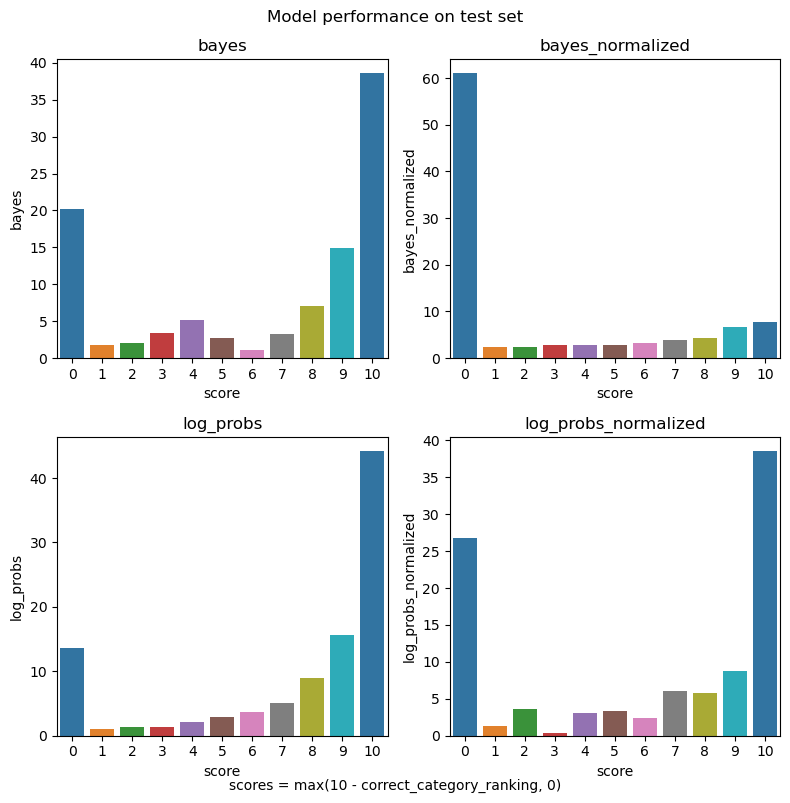

In [36]:
# # Plot the results as histograms
# import matplotlib.pyplot as plt
# import seaborn as sns

# # counts is the number of times each score appears in each column
# counts = results.apply(lambda x: x.value_counts()).T.stack()
# counts = counts.unstack(level=0).fillna(0)


# # Convert the counts to percentages
# counts = (counts / counts.sum()) * 100

# # Set index name to be "score"
# counts.index.name = "score"

# counts.reset_index(inplace=True)

# # Create vertical bar plots next to each other
# fig, ax = plt.subplots(2, 2, figsize=(8, 8))
# for i, column in enumerate(results.columns):
#     sns.barplot(
#         x=counts["score"], y=counts[column], ax=ax[i // 2, i % 2], palette="tab10"
#     )
#     ax[i // 2, i % 2].set_title(column)

# # Add a title
# plt.suptitle("Model performance on test set")
# # Add a note at the bottom
# plt.figtext(0.5, 0.01, "scores = max(10 - correct_category_ranking, 0)", ha="center", va="center")
# plt.tight_layout()

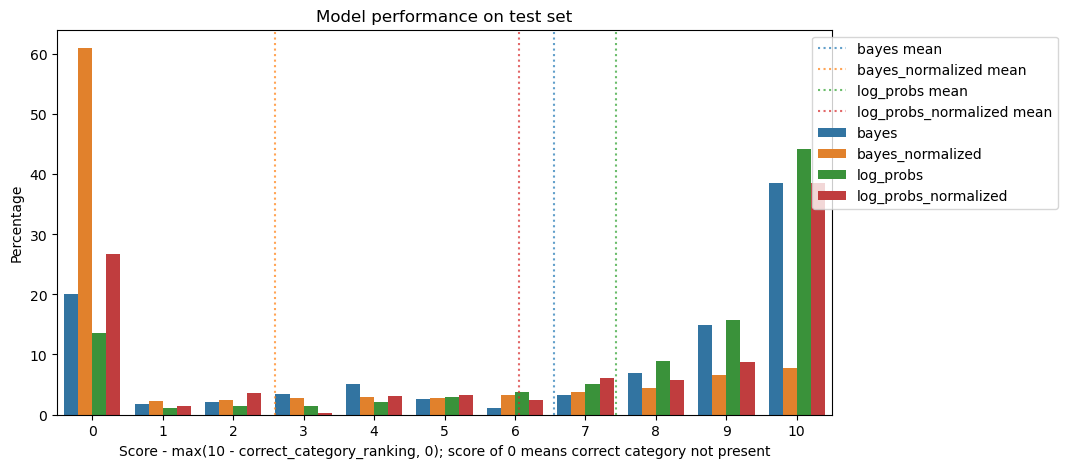

In [37]:
# counts2 = pd.DataFrame(results.apply(lambda x: x.value_counts()).T.stack())
# counts2.reset_index(inplace=True)
# counts2.columns = ["model", "score", "count"]

# counts2["perc"] = (counts2["count"] / len(test_set)) * 100

# # Palate is bright colors
# # Set size of axis to be 8, 8
# fig, ax = plt.subplots(figsize=(10, 5))
# sns.barplot(data=counts2, x="score", y="perc", hue="model", palette="tab10", ax=ax)

# # Set title to be "Model performance on test set"
# ax.set_title("Model performance on test set")
# # Set the y label to be "Percentage"
# ax.set_ylabel("Percentage")
# # Set the x label to be "Score"
# ax.set_xlabel("Score - max(10 - correct_category_ranking, 0); score of 0 means correct category not present")

# # Draw the means of each model as a vertical line
# for i, model in enumerate(results.columns):
#     ax.axvline(
#         results[model].mean(),
#         color=f"C{i}",
#         linestyle="dotted",
#         label=f"{model} mean",
#         alpha=0.7,
#     )

# # Add a legend off to the side
# ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1))

# Stratified Training Set

In [34]:
# Create training set where each category is represented by 1000 samples
training_set2 = pd.DataFrame()
for category in unique_categories:
    category_samples = ratings_data[ratings_data["categories"] == category].sample(1000, random_state=42, replace=True)
    training_set2 = pd.concat([training_set2, category_samples])

In [35]:
training_set2

title  price  \
1181568                     The Complete Calvin and Hobbes    NaN   
147610   Borden Tragedy: A Memoir of the Infamous Doubl...    NaN   
951814                                            Watchmen    NaN   
951615                                            Watchmen    NaN   
952158                                            Watchmen    NaN   
...                                                    ...    ...   
1076553                           The Blue Castle: A Novel    NaN   
1245797                              Strange empire (Swan)    NaN   
804026        Rural rides; (Penguin English library, EL23)    NaN   
1076474                           The Blue Castle: A Novel    NaN   
852154   Montcalm and Wolfe (France & England in North ...    NaN   

        review_helpfulness  review_score  \
1181568                5/5           5.0   
147610               23/24           5.0   
951814                 1/1           5.0   
951615                 0/1           5.0   
952158                 2/2           5.0   
...                    ...           ...   
1076553                0/5           4.0   
1245797                9/9           4.0   
804026                 1/1           5.0   
1076474                6/6           5.0   
852154               36/36           5.0   

                                                   summary  \
1181568                           Farewell, Spaceman Spiff   
147610       Lizzie Borden was the O.J. Simpson of her day   
951814                                               Great   
951615               human life is so brief and mundane...   
952158                                                 Wow   
...                                                    ...   
1076553                         A very interesting read...   
1245797                                     Strange Empire   
804026               A classic, but not a conventional one   
1076474                     Finding the Courage to Live...   
852154   Parkman&#65533;s masterpiece about the French ...   

                                                      text  \
1181568  For a little over ten years (less a couple of ...   
147610   Rick Geary makes that clear on the back cover ...   
951814   I've never read a book that delves so deeply i...   
951615   Alan Moore turned the comic medium on its head...   
952158   WOw this truly is a masterpiece. It deserves a...   
...                                                    ...   
1076553  This book is easy to read and very interesting...   
1245797  In large measure, this book is the history of ...   
804026   William Cobbett is a disagreeable character in...   
1076474  Canadian author Lucy Maud Montgomery's "The Bl...   
852154   This is simply a wonderful work of history! Fr...   

                                              cleaned_text  \
1181568  littl ten year less coupl sabbat noth brighten...   
147610   rick geari make clear back cover borden traged...   
951814   ive never read book delv deepli mind emot char...   
951615   alan moor turn comic medium head seri charact ...   
952158   wow truli masterpiec deserv prais gotten alan ...   
...                                                    ...   
1076553  book easi read interest opinion thing dont lik...   
1245797  larg measur book histori loui riel meti leader...   
804026   william cobbett disagre charact way scold ride...   
1076474  canadian author luci maud montgomeri blue cast...   
852154   simpli wonder work histori franci parkman cons...   

                      categories  
1181568  comics & graphic novels  
147610   comics & graphic novels  
951814   comics & graphic novels  
951615   comics & graphic novels  
952158   comics & graphic novels  
...                          ...  
1076553                   canada  
1245797                   canada  
804026                    canada  
1076474                   canada  
852154                    canada  

[136000 rows x 8 columns]

In [36]:
import catboost as cb
from sklearn.model_selection import train_test_split

In [37]:
# Get word_counts in the same order as training_set2
word_counts2 = word_counts[training_set2.index]

X_categories2 = word_counts2
y_categories2 = training_set2["categories"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_categories2, y_categories2, test_size=0.2, random_state=42
)

In [89]:


categories_model_2 = cb.CatBoostClassifier(iterations=1000, loss_function="MultiClass", verbose=True, save_snapshot=True, snapshot_interval=120)

categories_model_2.fit(X_train2, y_train2, eval_set=(X_test2, y_test2), verbose=False, plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [42]:
# Save the model in catboost format
# categories_model_2.save_model("categories_model_2.cbm")

NameError: name 'categories_model_2' is not defined

In [18]:
import catboost as cb
# Load the model
categories_model_2 = cb.CatBoostClassifier()
categories_model_2.load_model("categories_model_2.cbm")

In [19]:
# Inspect feature importances
feature_importances = categories_model_2.get_feature_importance(prettified=True)
feature_importances = pd.DataFrame(feature_importances)
# Sort by Feature Id
feature_importances = feature_importances.sort_values(by="Feature Id")
# Reset the index
feature_importances.reset_index(drop=True, inplace=True)

# Rename the columns
feature_importances["Name"] = vectorizer.get_feature_names_out()


feature_importances.sort_values(by="Importances", ascending=False, inplace=True)
feature_importances.head(10)

Feature Id  Importances      Name
905        1812     2.379643      hero
1392        310     1.744123     plain
1311        238     1.611945       old
583        1522     1.554317       due
323        1289     1.543829     china
1184       2063     1.288873    matter
128        1112     1.159519  approach
1667        559     1.127716    select
48         1040     1.105019     adapt
1372        293     1.099250       per

In [34]:
model = categories_model_2


def get_category_probabilities_catboost(words, normalize=False):
    # Normalize does nothing
    probs = model.predict_proba(vectorizer.transform([" ".join(words)]))[0]
    categories = model.classes_
    return {categories[i]: probs[i] for i in range(len(categories))}


def evaluate_model(row, model, normalize):
    # Return 10 points if the model predicts the correct category
    # 9 if it's the second most likely category, etc. If it's lower than 10 0
    words = row["cleaned_text"].split()

    # Get list of categories and their scores
    categories = sorted(
        model(words, normalize).items(), key=lambda x: x[1], reverse=True
    )

    # Get the index of the correct category
    correct_category = row["categories"]
    correct_index = [x[0] for x in categories].index(correct_category)

    # If the correct category is in the top 10, return 10 - the index
    if correct_index < 10:
        return 10 - correct_index
    else:
        return 0

In [35]:
row = ratings_data.loc[125]

rankings = get_category_probabilities_catboost(row["cleaned_text"].split(), False)

In [23]:
test_set = ratings_data.sample(10000, random_state=42)

# Use TQDM to show progress; apply for each row in the test_set
results = pd.DataFrame(
    columns=["bayes", "bayes_normalized", "log_probs", "log_probs_normalized", "catboost"]
)


# results = test_set.apply(test_row, axis=1)

results = pd.DataFrame(
    results, columns=["bayes", "bayes_normalized", "log_probs", "log_probs_normalized", "catboost"]
)


bayes = []
bayes_normalized = []
log_probs = []
log_probs_normalized = []
catboost = []

for index, row in tqdm.tqdm(test_set.iterrows(), total=len(test_set)):
    bayes.append(evaluate_model(row, get_most_likely_category, False))
    bayes_normalized.append(evaluate_model(row, get_most_likely_category, True))
    log_probs.append(evaluate_model(row, get_most_likely_category_log_probs, False))
    log_probs_normalized.append(
        evaluate_model(row, get_most_likely_category_log_probs, True)
    )
    catboost.append(evaluate_model(row, get_category_probabilities_catboost, False))

results["bayes"] = bayes
results["bayes_normalized"] = bayes_normalized
results["log_probs"] = log_probs
results["log_probs_normalized"] = log_probs_normalized
results["catboost"] = catboost

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [07:50<00:00, 21.25it/s]


In [39]:
# Get a dataframe with feature importances and the words
feature_importances = pd.DataFrame(
    model.get_feature_importance(prettified=True),
).sort_values(by="Feature Id").reset_index(drop=True)

feature_importances["Name"] = vectorizer.get_feature_names_out()

#
feature_importances.sort_values(by="Importances", ascending=False, inplace=True)
feature_importances.head(10)

Feature Id  Importances      Name
905        1812     2.379643      hero
1392        310     1.744123     plain
1311        238     1.611945       old
583        1522     1.554317       due
323        1289     1.543829     china
1184       2063     1.288873    matter
128        1112     1.159519  approach
1667        559     1.127716    select
48         1040     1.105019     adapt
1372        293     1.099250       per

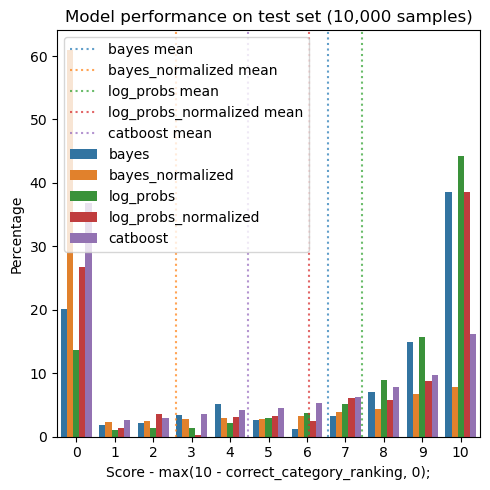

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

counts2 = pd.DataFrame(results.apply(lambda x: x.value_counts()).T.stack())
counts2.reset_index(inplace=True)
counts2.columns = ["model", "score", "count"]

counts2["perc"] = (counts2["count"] / len(test_set)) * 100

# Palate is bright colors
# Set size of axis to be 8, 8
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=counts2, x="score", y="perc", hue="model", palette="tab10", ax=ax)

# Set title to be "Model performance on test set"
ax.set_title("Model performance on test set (10,000 samples)")
# Set the y label to be "Percentage"
ax.set_ylabel("Percentage")
# Set the x label to be "Score"
ax.set_xlabel(
    "Score - max(10 - correct_category_ranking, 0);"
)

# Draw the means of each model as a vertical line
for i, model in enumerate(results.columns):
    ax.axvline(
        results[model].mean(),
        color=f"C{i}",
        linestyle="dotted",
        label=f"{model} mean",
        alpha=0.7,
    )

# Add a legend in the center
ax.legend()
# tight layout
plt.tight_layout()
# Save the plot
plt.savefig("full_model_performance1.png")

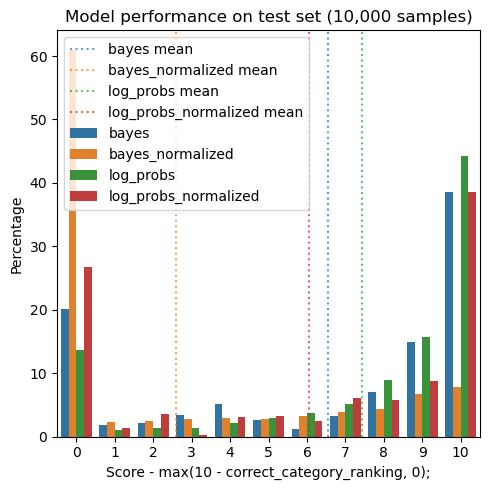

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

counts2 = pd.DataFrame(results.apply(lambda x: x.value_counts()).T.stack())
counts2.reset_index(inplace=True)
counts2.columns = ["model", "score", "count"]

counts2["perc"] = (counts2["count"] / len(test_set)) * 100

models = results.columns.drop("catboost")

# Palate is bright colors
# Set size of axis to be 8, 8
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=counts2[counts2["model"].isin(models)], x="score", y="perc", hue="model", palette="tab10", ax=ax)

# Set title to be "Model performance on test set"
ax.set_title("Model performance on test set (10,000 samples)")
# Set the y label to be "Percentage"
ax.set_ylabel("Percentage")
# Set the x label to be "Score"
ax.set_xlabel(
    "Score - max(10 - correct_category_ranking, 0);"
)

# Draw the means of each model as a vertical line
for i, model in enumerate(models):
    ax.axvline(
        results[model].mean(),
        color=f"C{i}",
        linestyle="dotted",
        label=f"{model} mean",
        alpha=0.7,
    )

# Add a legend
ax.legend()
# tight layout
plt.tight_layout()
# Save the plot
plt.savefig("bayes_model_performance0.png")


In [112]:
# Create a dataframe with columns bayes and rows score
counts = results.apply(lambda x: x.value_counts()).T.stack()
counts = counts.unstack(level=0).fillna(0)
# Normalize columns
counts = (counts / counts.sum()) * 100
# Print counts without the catboost column
counts.drop(columns="catboost")

# Create a row that is the sum of rows greater than zero
counts.loc["Rest"] = counts[counts.index > 0].sum()

# Drop rows that are greater than 0
counts = counts[counts.index.isin([0, "Rest"])]
# Rename rows
counts.rename(index={0: "Incorrect"}, inplace=True)
counts.rename(index={"Rest": "Correct"}, inplace=True)
counts.T

Incorrect  Correct
bayes                     20.14    79.86
bayes_normalized          61.00    39.00
log_probs                 13.65    86.35
log_probs_normalized      26.74    73.26
catboost                  36.77    63.23

In [41]:
word_counts[ratings_data[ratings_data["categories"] == category].index]

<439x2156 sparse matrix of type '<class 'numpy.int64'>'
	with 22800 stored elements in Compressed Sparse Row format>

In [42]:
# Check performance on each category in training set
# Get the unique categories by concatenating the categories column
results_2 = results.copy().reset_index()
test_set_2 = test_set.copy().reset_index()
# Add the categories to the results
results_2["categories"] = test_set_2["categories"]
results_2.drop(columns="index", inplace=True)
results_2

bayes  bayes_normalized  log_probs  log_probs_normalized  catboost  \
0        10                 0          0                    10         0   
1        10                 0         10                    10         7   
2         5                 0          0                     5         0   
3         2                 0          7                     2         4   
4        10                 0          8                    10         0   
...     ...               ...        ...                   ...       ...   
9995      8                 0          9                     8         7   
9996      0                 0          8                     0        10   
9997     10                 0          0                    10         0   
9998     10                 0          8                    10         5   
9999      0                 0          0                     0         0   

                     categories  
0                       fiction  
1                       fiction  
2          business & economics  
3           young adult fiction  
4                       fiction  
...                         ...  
9995  biography & autobiography  
9996         body mind & spirit  
9997                    fiction  
9998                    fiction  
9999              united states  

[10000 rows x 6 columns]

In [28]:
categories_mean = results_2.groupby("categories").mean()
categories_mean

bayes  bayes_normalized  log_probs  \
categories                                                         
"childrens literature"     0.000000          5.714286   4.714286   
"childrens stories"        0.000000          3.235294   5.823529   
adventure and adventurers  0.000000          6.571429   5.714286   
adventure stories          0.548387          6.322581   7.096774   
aeronautics                0.000000         10.000000  10.000000   
...                             ...               ...        ...   
union catalogs             0.000000          4.000000   3.000000   
united states              0.000000          4.769231   6.000000   
world war 1939-1945        0.000000          4.750000   5.000000   
young adult fiction        2.985401          3.131387   7.240876   
young adult nonfiction     0.000000          5.444444   5.222222   

                           log_probs_normalized   catboost  
categories                                                  
"childrens literature"                 0.000000   4.857143  
"childrens stories"                    0.000000   5.058824  
adventure and adventurers              0.000000   7.000000  
adventure stories                      0.000000   6.032258  
aeronautics                            0.000000  10.000000  
...                                         ...        ...  
union catalogs                         0.000000   6.400000  
united states                          0.000000   6.000000  
world war 1939-1945                    0.000000   5.000000  
young adult fiction                    1.948905   3.941606  
young adult nonfiction                 0.000000   5.333333  

[124 rows x 5 columns]

In [29]:
categories_mean.mean()

bayes                   0.805309
bayes_normalized        5.984862
log_probs               6.529381
log_probs_normalized    0.485468
catboost                6.745409
dtype: float64

In [110]:
# Count the number of times each category equals zero
nonzero_counts = categories_mean.apply(lambda x: x != 0).sum()
nonzero_percs = (nonzero_counts / len(categories_mean)) * 100
nonzero_percs = round(nonzero_percs, 2)
pd.DataFrame(nonzero_percs)

0
bayes                 32.26
bayes_normalized      97.58
log_probs             95.97
log_probs_normalized  10.48
catboost              97.58

In [49]:
importances = {}
for category in unique_categories:
    importances[category] = {}
    initial = math.log(category_sums[category] / total_words)

    for word in vectorizer.get_feature_names_out():
        if word not in word_frequencies[category]:
            continue

        numerators = word_frequencies[category][word] + 1

        denominators = category_sums[category] + len(word_frequencies[category])

        loglikelihood = math.log(numerators / denominators)

        importances[category][word] = initial + loglikelihood

importances_df = pd.DataFrame(importances)

# For each category, get the 10 most important words
most_important_words = {}
for category in unique_categories:
    most_important_words[category] = importances_df[category].sort_values(ascending=False).head(10)

most_important_words

{'comics & graphic novels': book       -8.829942
 stori      -9.150358
 read       -9.332455
 one        -9.463165
 comic      -9.649170
 like       -9.722295
 charact    -9.781290
 get       -10.084129
 time      -10.138094
 first     -10.206351
 Name: comics & graphic novels, dtype: float64,
 'biography & autobiography': book    -6.340519
 read    -7.045339
 one     -7.519877
 life    -7.610314
 time    -7.787923
 stori   -7.797377
 like    -7.849281
 would   -7.996065
 mani    -8.214785
 peopl   -8.253491
 Name: biography & autobiography, dtype: float64,
 'religion': book        -6.435348
 read        -7.305065
 god         -7.531350
 one         -7.591620
 christian   -7.655791
 would       -8.151776
 time        -8.178100
 like        -8.232284
 life        -8.237938
 mani        -8.262860
 Name: religion, dtype: float64,
 'fiction': book      -4.340036
 read      -4.895391
 stori     -5.370094
 one       -5.374316
 charact   -5.533790
 novel     -5.682861
 like      -5.692628
 ti

In [50]:
importances_df

comics & graphic novels  biography & autobiography   religion  \
10                    -13.119530                 -11.317576 -11.257767   
100                   -13.384865                 -11.524730 -11.753309   
11                    -14.320682                 -12.315605 -12.165841   
12                    -13.065909                 -11.682191 -11.712964   
13                    -14.050762                 -12.051487 -12.180681   
...                          ...                        ...        ...   
young                 -11.807996                  -9.314941 -10.456195   
younger               -13.325866                 -11.610176 -12.528849   
your                  -11.752488                 -10.356742 -10.529278   
youth                 -13.579415                 -11.084253 -11.762014   
youv                  -12.669859                 -11.318277 -11.585172   

           fiction  social science  reference  juvenile nonfiction  \
10       -9.302427      -12.437487 -13.205048           -12.265212   
100      -9.434704      -12.572859 -13.822772           -13.264257   
11      -10.427263      -13.234565 -14.800756           -13.197882   
12       -9.620402      -12.957655 -13.822772           -12.390014   
13      -10.097804      -13.691323 -14.823745           -13.319687   
...            ...             ...        ...                  ...   
young    -7.298346      -11.041051 -12.634303           -10.411060   
younger  -9.287035      -13.068244 -14.441811           -12.234988   
your     -8.241001      -11.502488 -12.289680           -11.975727   
youth    -9.504604      -12.673589 -14.474072           -12.888645   
youv     -9.029523      -12.718041 -13.397560           -13.041113   

         technology & engineering    history        law  ...  \
10                     -13.543730 -11.386488 -13.944287  ...   
100                    -14.087345 -11.335270 -14.325998  ...   
11                     -14.509618 -11.919070 -15.410624  ...   
12                     -14.076296 -11.771885 -14.738530  ...   
13                     -14.758514 -11.993375 -14.977760  ...   
...                           ...        ...        ...  ...   
young                  -13.481210 -10.109985 -13.852480  ...   
younger                -16.022206 -12.237044 -15.698306  ...   
your                   -12.746513 -10.767738 -13.112214  ...   
youth                  -15.753942 -11.823992 -15.698306  ...   
youv                   -14.076296 -11.922914 -14.528235  ...   

         christmas stories  australia  church history  english literature  \
10              -15.907314 -17.638676      -17.589956          -17.284222   
100             -15.842776 -18.044141      -17.995421          -16.473292   
11              -15.724993 -18.737289      -18.688569          -18.670517   
12              -15.437311 -18.044141      -17.079131          -17.284222   
13              -16.535923 -17.638676      -18.688569          -18.670517   
...                    ...        ...             ...                 ...   
young           -14.149456 -15.646246      -15.980518          -14.981637   
younger         -15.357268 -18.044141      -16.491344          -16.724607   
your            -15.118857 -15.964700      -16.385984          -16.272621   
youth           -16.130458 -18.737289      -18.688569          -17.284222   
youv            -15.031846 -16.791378      -17.995421          -17.061079   

         encyclopedias and dictionaries   business  cooking american  \
10                           -16.470130 -16.477003        -17.844059   
100                          -18.772715 -16.189321        -18.249524   
11                           -17.163277 -17.981081        -18.942671   
12                           -17.163277 -17.981081        -18.942671   
13                           -16.693273 -17.575615        -18.942671   
...                                 ...        ...               ...   
young                        -15.939502 -17.287933        -17.333233   
younger  

In [103]:
most_important_words["medicine"]

book      -12.267458
read      -13.602776
russian   -13.602776
soldier   -13.664908
war       -13.780290
like      -13.862734
one       -13.894482
medic     -14.005234
german    -14.070373
would     -14.099643
Name: medicine, dtype: float64

In [101]:
list(importances_df.columns)

['comics & graphic novels',
 'biography & autobiography',
 'religion',
 'fiction',
 'social science',
 'reference',
 'juvenile nonfiction',
 'technology & engineering',
 'history',
 'law',
 'political science',
 'health & fitness',
 'cooking',
 'philosophy',
 'europe',
 'sports & recreation',
 'body mind & spirit',
 'psychology',
 'crafts & hobbies',
 'language arts & disciplines',
 'juvenile fiction',
 'foreign language study',
 'medical',
 'architecture',
 'art',
 'family & relationships',
 'gardening',
 'games',
 'science',
 'computers',
 'english language',
 'performing arts',
 'adventure stories',
 'families',
 'travel',
 'business & economics',
 'bible',
 'great britain',
 'humor',
 'mathematics',
 'poetry',
 'education',
 'music',
 'drama',
 'literary collections',
 'american wit and humor',
 'audiobooks',
 'world war 1939-1945',
 'nature',
 'bibles',
 'literary criticism',
 'christian life',
 'detective and mystery stories',
 'authors english',
 'design',
 'antiques & collectib